In [1]:
import scipy.misc
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
INDEX_TRAIN_BATH = 0
INDEX_TEST_BATH = 0
DATASET_FOLDER_PATH = 'datasets/data.txt'
IMAGES_FOLDER_PATH = 'driving_dataset/'

In [3]:
df_data = []
df_label = []

with open(DATASET_FOLDER_PATH, 'r') as file:
        
    for line in file:
        df_data.append(IMAGES_FOLDER_PATH + line.split(" ")[0].strip())
        df_label.append(line.split(" ")[1].strip())


In [4]:
# Inputs
LIMIT = 1000

df_data, df_label = shuffle(df_data, df_label, random_state=22)

X_train = df_data
X_test = X_train[:LIMIT]
X_train = X_train[LIMIT:]

# Outputs
Y_train = df_label
Y_test = Y_train[:LIMIT]
Y_train = Y_train[LIMIT:]

In [5]:
num_train_images = len(X_train)
num_test_images = len(Y_train)

In [6]:
def get_train_batch(batch_size):
    global INDEX_TRAIN_BATH
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(X_train[(INDEX_TRAIN_BATH + i) % num_train_images])[-150:], [64, 224]) / 255.0)
        y_out.append([Y_train[(INDEX_TRAIN_BATH + i) % num_train_images]])
    INDEX_TRAIN_BATH += batch_size
    return x_out, y_out

In [7]:
df = get_train_batch(1)

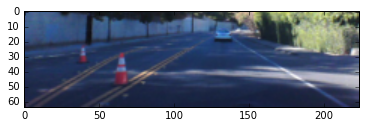

In [8]:
plt.imshow(df[0][0])